<a href="https://colab.research.google.com/github/AbhijithP96/DeepL_CV/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [3]:
n_pts = 100
centers = [[-0.5,0.5],[0.5,-0.5]]
X, y = datasets.make_blobs(n_samples=n_pts,random_state=123,centers=centers, cluster_std=0.4)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100,1))

In [4]:
def scatter_plot():
  plt.scatter(X[y==0,0],X[y==0,1]) #blue = 0
  plt.scatter(X[y==1,0],X[y==1,1]) #orange = 1

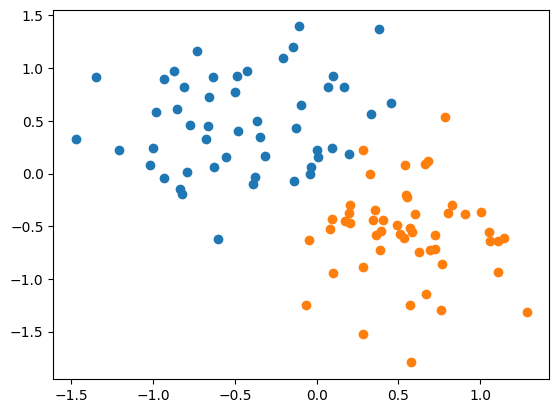

In [5]:
scatter_plot()

In [6]:
class Model(nn.Module):
  def __init__(self,input_size,output_size):
    super().__init__()
    self.linear = nn.Linear(input_size,output_size)
  def forward(self,x):
    pred = torch.sigmoid(self.linear(x))
    return pred
  def predict(self,x):
    pred = self.forward(x)
    if pred >= 0.5 :
      return 1
    else:
      return 0

In [7]:
model = Model(2,1)

In [8]:
[w,b] = model.parameters()
w1,w2 = w.view(2)
def get_params():
  return w1.item(),w2.item(),b[0].item()

In [9]:
def plot_fit(title):
  plt.title(title)
  w1,w2,b = get_params()
  x1 = np.array([-2.0,2.0])
  x2 = (w1*x1 + b) /-w2
  scatter_plot()
  plt.plot(x1,x2,'r')


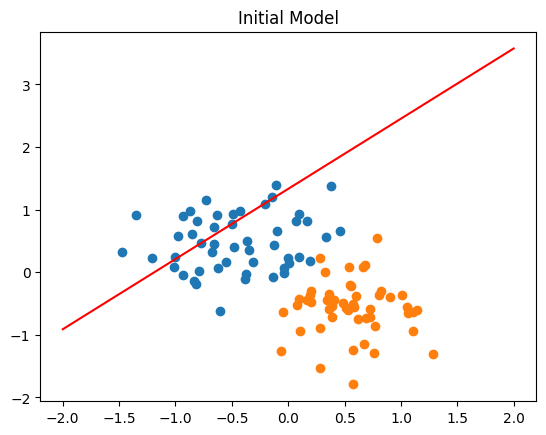

In [10]:
plot_fit('Initial Model')

In [11]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters() , lr=0.01)

In [12]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred,y_data)
  print(f'epochs: {i} \t loss: {loss.item()}')

  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epochs: 0 	 loss: 1.0020560026168823
epochs: 1 	 loss: 0.9996554851531982
epochs: 2 	 loss: 0.997261643409729
epochs: 3 	 loss: 0.9948746562004089
epochs: 4 	 loss: 0.9924943447113037
epochs: 5 	 loss: 0.9901209473609924
epochs: 6 	 loss: 0.9877542853355408
epochs: 7 	 loss: 0.9853943586349487
epochs: 8 	 loss: 0.9830412864685059
epochs: 9 	 loss: 0.9806949496269226
epochs: 10 	 loss: 0.9783554673194885
epochs: 11 	 loss: 0.9760226607322693
epochs: 12 	 loss: 0.973696768283844
epochs: 13 	 loss: 0.9713775515556335
epochs: 14 	 loss: 0.9690650701522827
epochs: 15 	 loss: 0.966759443283081
epochs: 16 	 loss: 0.9644606113433838
epochs: 17 	 loss: 0.9621684551239014
epochs: 18 	 loss: 0.9598830938339233
epochs: 19 	 loss: 0.9576045870780945
epochs: 20 	 loss: 0.9553326368331909
epochs: 21 	 loss: 0.9530674815177917
epochs: 22 	 loss: 0.950809121131897
epochs: 23 	 loss: 0.9485576152801514
epochs: 24 	 loss: 0.9463127255439758
epochs: 25 	 loss: 0.9440746307373047
epochs: 26 	 loss: 0.94184

Text(0.5, 0, 'Epochs')

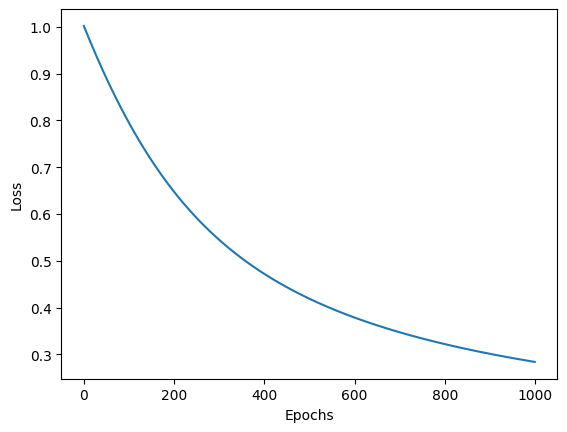

In [13]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')

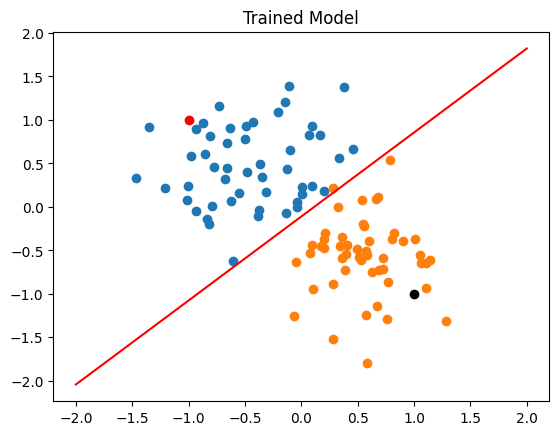

In [19]:
point1 = torch.tensor([1.0,-1.0])
point2 = torch.tensor([-1.0,1.0])
plt.plot(point1.numpy()[0],point1.numpy()[1],'ko')
plt.plot(point2.numpy()[0],point2.numpy()[1],'ro')
plot_fit('Trained Model')

In [20]:
print(f'Black Point class : {model.predict(point1)}')
print(f'Red Point class : {model.predict(point2)}')

Black Point class : 1
Red Point class : 0
